A general workflow for dealing with missing values:

1. Check for errors in data cleaning/transformation.
2. Use data from additional sources to fill missing values.
3. Drop row/column.
4. Fill missing values with reasonable estimates computed from the available data.


In [1]:
import pandas as pd

happiness2015 = pd.read_csv("wh_2015.csv")
happiness2016 = pd.read_csv("wh_2016.csv")
happiness2017 = pd.read_csv("wh_2017.csv")

In [2]:
shape_2015 = happiness2015.shape
shape_2016 = happiness2016.shape
shape_2017 = happiness2017.shape
print(shape_2015, shape_2016, shape_2017)

(164, 13) (164, 14) (164, 13)


In [3]:
# Use .isnull.sum() to get a summary of the rows with missing values
# Result is a series indexed by column name, and with value showing the total missing values for that column
missing_2015 = happiness2015.isnull().sum()
missing_2015

Country                          0
Region                           6
Happiness Rank                   6
Happiness Score                  6
Standard Error                   6
Economy (GDP per Capita)         6
Family                           6
Health (Life Expectancy)         6
Freedom                          6
Trust (Government Corruption)    6
Generosity                       6
Dystopia Residual                6
Year                             0
dtype: int64

In [4]:
missing_2016 = happiness2016.isnull().sum()
missing_2016

Country                          0
Region                           7
Happiness Rank                   7
Happiness Score                  7
Lower Confidence Interval        7
Upper Confidence Interval        7
Economy (GDP per Capita)         7
Family                           7
Health (Life Expectancy)         7
Freedom                          7
Trust (Government Corruption)    7
Generosity                       7
Dystopia Residual                7
Year                             0
dtype: int64

In [5]:
missing_2017 = happiness2017.isnull().sum()
missing_2017
# Note the variations in some column names

Country                          0
Happiness.Rank                   9
Happiness.Score                  9
Whisker.high                     9
Whisker.low                      9
Economy..GDP.per.Capita.         9
Family                           9
Health..Life.Expectancy.         9
Freedom                          9
Generosity                       9
Trust..Government.Corruption.    9
Dystopia.Residual                9
Year                             0
dtype: int64

In [6]:
# Clean up column names so they are consistent
def clean_cols(cols):
    return cols \
    .str.replace("(", " ") \
    .str.replace(")", " ") \
    .str.replace(".", " ") \
    .str.replace("\s+", " ") \
    .str.strip() \
    .str.upper()

happiness2015.columns = clean_cols(happiness2015.columns)
happiness2016.columns = clean_cols(happiness2016.columns)
happiness2017.columns = clean_cols(happiness2017.columns)

print(happiness2015.columns)
print(happiness2016.columns)
print(happiness2017.columns)

Index(['COUNTRY', 'REGION', 'HAPPINESS RANK', 'HAPPINESS SCORE',
       'STANDARD ERROR', 'ECONOMY GDP PER CAPITA', 'FAMILY',
       'HEALTH LIFE EXPECTANCY', 'FREEDOM', 'TRUST GOVERNMENT CORRUPTION',
       'GENEROSITY', 'DYSTOPIA RESIDUAL', 'YEAR'],
      dtype='object')
Index(['COUNTRY', 'REGION', 'HAPPINESS RANK', 'HAPPINESS SCORE',
       'LOWER CONFIDENCE INTERVAL', 'UPPER CONFIDENCE INTERVAL',
       'ECONOMY GDP PER CAPITA', 'FAMILY', 'HEALTH LIFE EXPECTANCY', 'FREEDOM',
       'TRUST GOVERNMENT CORRUPTION', 'GENEROSITY', 'DYSTOPIA RESIDUAL',
       'YEAR'],
      dtype='object')
Index(['COUNTRY', 'HAPPINESS RANK', 'HAPPINESS SCORE', 'WHISKER HIGH',
       'WHISKER LOW', 'ECONOMY GDP PER CAPITA', 'FAMILY',
       'HEALTH LIFE EXPECTANCY', 'FREEDOM', 'GENEROSITY',
       'TRUST GOVERNMENT CORRUPTION', 'DYSTOPIA RESIDUAL', 'YEAR'],
      dtype='object')


In [7]:
# Combine the dataframes
combined = pd.concat([happiness2015, happiness2016, happiness2017], ignore_index=True)
combined

,COUNTRY,REGION,HAPPINESS RANK,HAPPINESS SCORE,STANDARD ERROR,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,TRUST GOVERNMENT CORRUPTION,GENEROSITY,DYSTOPIA RESIDUAL,YEAR,LOWER CONFIDENCE INTERVAL,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,NaN,NaN,NaN,NaN
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,NaN,NaN,NaN,NaN
2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,NaN,NaN,NaN,NaN
3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,NaN,NaN,NaN,NaN
4,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN
488,Somaliland Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN
489,Somaliland region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN
490,Suriname,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN


In [8]:
# Check for missing values when column names are uniform
missing = combined.isnull().sum()
missing

COUNTRY                          0
REGION                         177
HAPPINESS RANK                  22
HAPPINESS SCORE                 22
STANDARD ERROR                 334
ECONOMY GDP PER CAPITA          22
FAMILY                          22
HEALTH LIFE EXPECTANCY          22
FREEDOM                         22
TRUST GOVERNMENT CORRUPTION     22
GENEROSITY                      22
DYSTOPIA RESIDUAL               22
YEAR                             0
LOWER CONFIDENCE INTERVAL      335
UPPER CONFIDENCE INTERVAL      335
WHISKER HIGH                   337
WHISKER LOW                    337
dtype: int64

In [9]:
# Visualising missing data
combined_updated = combined.set_index("YEAR")
combined_updated

,COUNTRY,REGION,HAPPINESS RANK,HAPPINESS SCORE,STANDARD ERROR,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,TRUST GOVERNMENT CORRUPTION,GENEROSITY,DYSTOPIA RESIDUAL,LOWER CONFIDENCE INTERVAL,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW
YEAR,,,,,,,,,,,,,,,,
2015,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,NaN,NaN,NaN,NaN
2015,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,NaN,NaN,NaN,NaN
2015,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,NaN,NaN,NaN,NaN
2015,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,NaN,NaN,NaN,NaN
2015,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017,Somaliland Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017,Somaliland region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:ylabel='YEAR'>

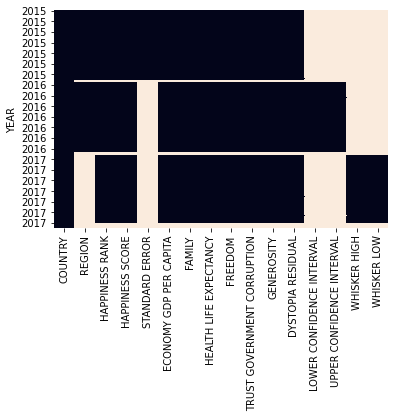

In [12]:
import seaborn as sns
sns.heatmap(combined_updated.isnull(), cbar=False)

In [ ]:
# Confirm REGION data is missing from 2017
print("Row count for 2017 data = {}".format(combined[combined["YEAR"] == 2017].shape[0]))
regions_2017 = combined[combined["YEAR"] == 2017]
regions_2017.head()

In [ ]:
missing = regions_2017.isnull().sum()
missing

In [ ]:
# There are 164 rows of 2017 data and 164 rows with missing REGION, therefore all rows are missing region.
# Region should be the same for 2016, 2016 and 2017 data sets

# merge country and regions from the 2015 and 2016 dataframes
country_regions = pd.merge(left=happiness2015[["COUNTRY", "REGION"]],  \
                           right=happiness2016[["COUNTRY", "REGION"]], \
                           how="left", on="COUNTRY")
country_regions

In [ ]:
def get_region(element):
    if element != "":
        return element
    
country_regions["REGION"] = country_regions["REGION_x"].apply(get_region)
country_regions["REGION"] = country_regions["REGION_y"].apply(get_region)
country_regions


In [ ]:
country_regions.isnull().sum()

In [ ]:
happiness2016[happiness2016["REGION"].isnull()]

In [ ]:
country_regions = country_regions.drop("REGION_x", axis=1)
country_regions = country_regions.drop("REGION_y", axis=1)

In [ ]:
country_regions[country_regions["REGION"].isnull()]
# still have some missing regions

In [ ]:
# check for duplicates - country and year

# standardise as uppercase
combined["COUNTRY"] = combined["COUNTRY"].str.upper()

# interested in rows where both country and year are duplicated
dups = combined.duplicated(["COUNTRY","YEAR"])
combined[dups]


In [ ]:
combined[combined["COUNTRY"] == "SOMALILAND REGION"]

In [ ]:
# drop duplicates will drop duplicate rows (by defaults keeps first and drops rest).
# Here the columns to check for duplication are specified, otherwise all columns must 
# be the same to qualify as a duplicate.
combined.drop_duplicates(["COUNTRY", "YEAR"], inplace=True)
combined[combined["COUNTRY"] == "SOMALILAND REGION"]


In [ ]:
# How many missing values are left in the dataframe?
combined.isnull().sum()

In [ ]:
# drop columns with lots of missing data, and that have no impact on what we are trying to do
cols_to_drop = ["STANDARD ERROR", "LOWER CONFIDENCE INTERVAL", "UPPER CONFIDENCE INTERVAL", "WHISKER HIGH", "WHISKER LOW"]
combined2 = combined.drop(columns=cols_to_drop)
combined2.isnull().sum()

### `df.dropna()`

For larger datasets it isn't practical to make a list of columns to drop so `df.dropna()` is used.

- default will drop rows with _any_ missing values
- with `axis=1` will drop columns with _any_ missing values
- use `thresh` parameter to only drop columns if they contain below a certain number of non-null values


In [ ]:
# Confirm number of values that are NOT missing
combined.notnull().sum().sort_values()

In [ ]:
# Above can see that the first 5 results are the ones we want to drop - 
# because they only have 155-158 useful values
combined = combined.dropna(axis=1, thresh=200)
combined.notnull().sum().sort_values()

In [ ]:
# Have another look at what is missing
combined.isnull().sum()

### `df.fillna()`

- Sometimes missing values can be filled in with a mean or similar


In [14]:
# Replace missing happiness scores with the average
happiness_mean = combined["HAPPINESS SCORE"].mean()
print("MEAN HAPPINESS SCORE:", happiness_mean)
# returns a series
combined["HAPPINESS SCORE UPDATED"] = combined["HAPPINESS SCORE"].fillna(happiness_mean)
# combined["HAPPINESS SCORE UPDATED"] = combined.loc[:, "HAPPINESS SCORE"].fillna(happiness_mean)
# The mean of the updated series should match the mean of the original
print("MEAN HAPPINESS SCORE (UPDATED)", combined["HAPPINESS SCORE UPDATED"].mean())

MEAN HAPPINESS SCORE: 5.37072765988289
MEAN HAPPINESS SCORE (UPDATED) 5.370727659882891


### Working With Missing And Duplicate Data

#### Syntax

---

##### IDENTIFYING MISSING VALUES

- Identify rows with missing values in a specific column:

```python
missing = df[col_name].isnull()
df[missing]
```

- Calculate the number of missing values in each column:

```python 
df.isnull().sum()
```

---

##### REMOVING MISSING VALUES

- Drop rows with any missing values:

```python
df.dropna()
```

- Drop specific columns:

```python
df.drop(columns_to_drop, axis=1)
```

- Drop columns with less than a certain number of non-null values:

```python
df.dropna(thresh = min_nonnull, axis=1)
```

---

##### REPLACING MISSING VALUES

- Replace missing values in a column with another value:

```python
df[col_name].fillna(replacement_value)
```

---

##### VISUALIZING MISSING DATA

- Use a heatmap to visualize missing data:

```python
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False)
```

---

##### CORRECTING DUPLICATE VALUES

- Identify duplicates values:

```python
dups = df.duplicated()
df[dups]
```

- Identify rows with duplicate values in only certain columns:

```python
dups = df.duplicated([col_1, col_2])
df[dups]
```

- Drop duplicate values. Keep the first duplicate row:

```python
df.drop_duplicates()
```

- Drop rows with duplicate values in only certain columns. Keep the last duplicate row:

```python
combined.drop_duplicates([col_1, col_2], keep='last')
```

#### Concepts
- Missing or duplicate data may exist in a data set for many reasons. Sometimes, they may exist because of user input errors or data conversion issues; other times, they may be introduced while performing data cleaning tasks. In the case of missing values, they may also exist in the original data set to purposely indicate that data is unavailable.
- In pandas, missing values are generally represented by the NaN value or the None value.
- To handle missing values, first check for errors made while performing data cleaning tasks. Then, try to use available data from other sources (if it exists) to fill them in. Otherwise, consider dropping them or replacing them with other values.

#### Resources
- [Working with Missing Data](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html)